remove white space on plotly objects  
ask dr.clark about proper plotting


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# set plot width here
plt.rcParams['figure.figsize'] = (15, 10)
from functions import import_data, my_plot_function

today = pd.to_datetime('today').strftime('%Y-%m-%d')

tickers = ['^VIX','^VIX3M', 'VXX']

VIX = import_data(tickers[0], '2018-01-01', today, '1d')
VIX3M = import_data(tickers[1], '2018-01-01', today, '1d')
VXX = import_data(tickers[2], '2018-01-01', today, '1d')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


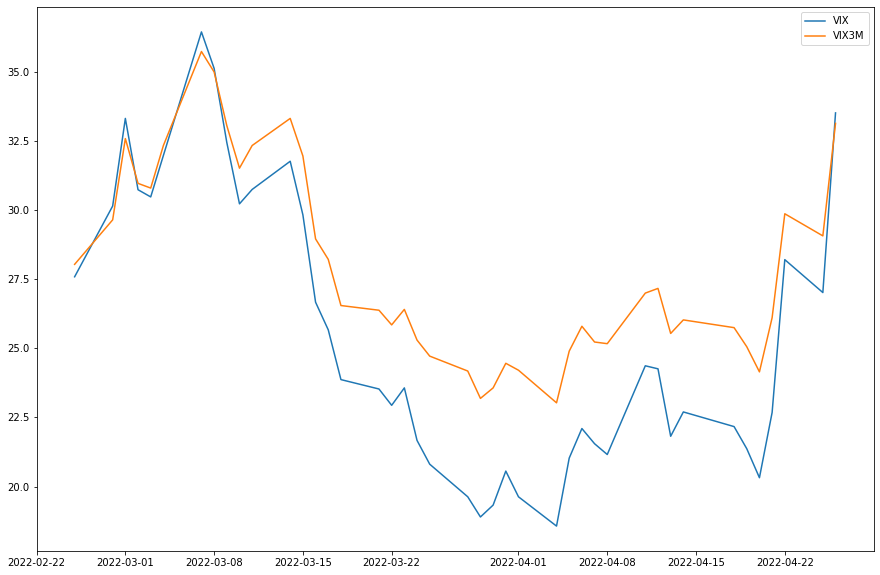

In [2]:
# plot vix and vix3m for the past month
plt.plot(VIX[-42:].index, VIX[-42:]['Close'], label='VIX')
plt.plot(VIX3M[-42:].index, VIX3M[-42:]['Close'], label='VIX3M')
plt.legend()
plt.show()



In [3]:
# repeat above cell with plotly for interactive plotting
import plotly.graph_objects as go
plot = go.Figure()
plot.add_trace(go.Line(x=VIX[-42:].index, y=VIX[-42:]['Close'], name='VIX'))
plot.add_trace(go.Line(x=VIX3M[-42:].index, y=VIX3M[-42:]['Close'], name='VIX3M'))
plot.show()


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




## The above shows that our most recent flip was correct

put in image from realtest

In [4]:
# housekeeping to combine dataframes later

df_master = pd.DataFrame(index=VIX.index)
df_master['VXX'] = VXX['Close'].round(2)
df_master['VIX'] = VIX['Close'].round(2)
df_master['VIX3M'] = VIX3M['Close'].round(2)
df_master['Contango'] = df_master['VIX'] < df_master['VIX3M']
df_master.tail(10)


VXX    VIX  VIX3M  Contango
Date                                     
2022-04-12  25.74  24.26  27.17      True
2022-04-13  24.59  21.82  25.54      True
2022-04-14  24.99  22.70  26.03      True
2022-04-18  25.31  22.17  25.75      True
2022-04-19  24.73  21.37  25.06      True
2022-04-20  24.39  20.32  24.15      True
2022-04-21  24.86  22.68  26.11      True
2022-04-22  26.15  28.21  29.87      True
2022-04-25  24.80  27.02  29.07      True
2022-04-26  26.35  33.52  33.14     False


* NOTE:  Remove the rounding in production code.

In [5]:
df_master.tail(21)

VXX    VIX  VIX3M  Contango
Date                                     
2022-03-28  25.73  19.63  24.18      True
2022-03-29  24.85  18.90  23.19      True
2022-03-30  25.00  19.33  23.57      True
2022-03-31  25.70  20.56  24.46      True
2022-04-01  25.03  19.63  24.21      True
2022-04-04  24.43  18.57  23.03      True
2022-04-05  24.81  21.03  24.90      True
2022-04-06  24.38  22.10  25.80      True
2022-04-07  24.05  21.55  25.23      True
2022-04-08  24.67  21.16  25.17      True
2022-04-11  26.10  24.37  27.00      True
2022-04-12  25.74  24.26  27.17      True
2022-04-13  24.59  21.82  25.54      True
2022-04-14  24.99  22.70  26.03      True
2022-04-18  25.31  22.17  25.75      True
2022-04-19  24.73  21.37  25.06      True
2022-04-20  24.39  20.32  24.15      True
2022-04-21  24.86  22.68  26.11      True
2022-04-22  26.15  28.21  29.87      True
2022-04-25  24.80  27.02  29.07      True
2022-04-26  26.35  33.52  33.14     False

In [6]:
df = pd.read_csv('vxx_xl.csv')
# housekeeping
df.drop(['symbol'], inplace=True, axis=1)
# add - to date, exdate, and last date after 4 characters
df['date'] = pd.to_datetime(df['date'].astype(str), format='%Y%m%d')
df['exdate'] = pd.to_datetime(df['exdate'].astype(str), format='%Y%m%d')
df['last_date'] = pd.to_datetime(df['last_date'].astype(str), format='%Y%m%d')
df = df[df['volume'] != 0]
# strike price is 100x too large
df['strike_price'] = df['strike_price'] / 1000

# Thank you to Bruce for the following code snippet.
# In short: never iterate through the dataframe if you can avoid it.
# Use a built in function or vectorize if possible.

df_combined = pd.DataFrame()
df_combined = df.merge(df_master, how = 'left', left_on = 'date', right_on = 'Date')
df_combined.tail(20)

secid       date     exdate  last_date cp_flag  strike_price  \
721228  212622 2021-12-31 2022-06-17 2021-12-31       C          32.0   
721229  212622 2021-12-31 2022-06-17 2021-12-31       P          14.0   
721230  212622 2021-12-31 2022-06-17 2021-12-31       P          15.0   
721231  212622 2021-12-31 2022-06-17 2021-12-31       P          20.0   
721232  212622 2021-12-31 2022-06-17 2021-12-31       P          25.0   
721233  212622 2021-12-31 2022-06-17 2021-12-31       P          28.0   
721234  212622 2021-12-31 2022-06-17 2021-12-31       P          35.0   
721235  212622 2021-12-31 2022-06-17 2021-12-31       P          40.0   
721236  212622 2021-12-31 2022-06-17 2021-12-31       P          45.0   
721237  212622 2021-12-31 2023-01-20 2021-12-31       C          10.0   
721238  212622 2021-12-31 2023-01-20 2021-12-31       C          14.0   
721239  212622 2021-12-31 2023-01-20 2021-12-31       C          17.0   
721240  212622 2021-12-31 2023-01-20 2021-12-31       C          18.0   
721241  212622 2021-12-31 2023-01-20 2021-12-31       P          10.0   
721242  212622 2021-12-31 2023-01-20 2021-12-31       P          11.0   
721243  212622 2021-12-31 2023-01-20 2021-12-31       P          12.0   
721244  212622 2021-12-31 2023-01-20 2021-12-31       P          13.0   
721245  212622 2021-12-31 2023-01-20 2021-12-31       P          18.0   
721246  212622 2021-12-31 2023-01-20 2021-12-31       P          20.0   
721247  212622 2021-12-31 2023-01-20 2021-12-31       P           8.0   

        best_bid  best_offer  volume  open_interest  ...  theta   optionid  \
721228      0.19        0.24       3             59  ...    NaN  132781828   
721229      9.85        9.95      35           1237  ...    NaN  132067746   
721230     10.80       10.90      33            598  ...    NaN  132067747   
721231     15.70       15.80      90            418  ...    NaN  132203098   
721232     20.60       20.75     105            299  ...    NaN  132203103   
721233     23.60       23.70      20            144  ...    NaN  132269791   
721234     30.55       30.65      55            106  ...    NaN  132897778   
721235     35.50       35.60       6             67  ...    NaN  132897783   
721236     40.45       40.60       2             17  ...    NaN  132897788   
721237      1.16        1.31     100            392  ...    NaN  138145986   
721238      0.90        1.05       2            280  ...    NaN  136017322   
721239      0.76        0.92      75            261  ...    NaN  136017325   
721240      0.73        0.88      30            233  ...    NaN  136017326   
721241      6.65        6.80      50           1360  ...    NaN  138145998   
721242      7.55        7.75      50            171  ...    NaN  138145999   
721243      8.50        8.65      40           3229  ...    NaN  138146000   
721244      9.40        9.60      88            241  ...    NaN  138146001   
721245     14.15       14.35      28            232  ...    NaN  136017355   
721246     16.10       16.30      25            282  ...    NaN  136017357   
721247      4.85        5.00      50            195  ...    NaN  138146008   

        ticker  index_flag             issuer  exercise_style    VXX    VIX  \
721228     VXX           0  BARCLAYS BANK PLC               A  18.53  17.22   
721229     VXX           0  BARCLAYS BANK PLC               A  18.53  17.22   
721230     VXX           0  BARCLAYS BANK PLC               A  18.53  17.22   
721231     VXX           0  BARCLAYS BANK PLC               A  18.53  17.22   
721232     VXX           0  BARCLAYS BANK PLC               A  18.53  17.22   
721233     VXX           0  BARCLAYS BANK PLC               A  18.53  17.22   
721234     VXX           0  BARCLAYS BANK PLC               A  18.53  17.22   
721235     VXX           0  BARCLAYS BANK PLC               A  18.53  17.22   
721236     VXX           0  BARCLAYS BANK PLC               A  18.53  17.22   
721237     VXX           0  BARCLAYS BANK PLC 

In [7]:
# How many NaN values are in the dataframe
print(len(df_combined))
df_combined.isna().sum()


721248


secid                  0
date                   0
exdate                 0
last_date              0
cp_flag                0
strike_price           0
best_bid               0
best_offer             0
volume                 0
open_interest          0
impl_volatility    55648
delta              55648
gamma              55648
vega               55648
theta              55648
optionid               0
ticker                 0
index_flag             0
issuer                 0
exercise_style         0
VXX                10061
VIX                    0
VIX3M                  0
Contango               0
dtype: int64

Perhaps this is because of.... low volume?  Let's clean up strike so that we only have strike within 20% of VXX

In [8]:
df_combined = df_combined.where(df_combined['strike_price'] < df_combined['VXX']*1.2).dropna()
df_combined = df_combined.where(df_combined['strike_price'] > df_combined['VXX']*0.8).dropna()
print(len(df_combined))
# The 17 here is to only have the same option expiry date
df_combined.tail(17)

58827


secid       date     exdate  last_date cp_flag  strike_price  \
721121  212622.0 2021-12-31 2022-06-17 2021-12-31       P          21.0   
721122  212622.0 2021-12-31 2022-06-17 2021-12-31       P          22.0   
721160  212622.0 2021-12-31 2022-11-18 2021-12-31       C          17.0   
721161  212622.0 2021-12-31 2022-11-18 2021-12-31       C          18.0   
721162  212622.0 2021-12-31 2022-11-18 2021-12-31       C          20.0   
721165  212622.0 2021-12-31 2022-11-18 2021-12-31       P          17.0   
721166  212622.0 2021-12-31 2022-11-18 2021-12-31       P          18.0   
721167  212622.0 2021-12-31 2022-11-18 2021-12-31       P          22.0   
721171  212622.0 2021-12-31 2023-01-20 2021-12-31       C          15.0   
721172  212622.0 2021-12-31 2023-01-20 2021-12-31       C          20.0   
721186  212622.0 2021-12-31 2023-01-20 2021-12-31       P          15.0   
721187  212622.0 2021-12-31 2023-01-20 2021-12-31       P          20.0   
721195  212622.0 2021-12-31 2023-06-16 2021-12-31       C          15.0   
721202  212622.0 2021-12-31 2023-06-16 2021-12-31       P          20.0   
721206  212622.0 2021-12-31 2024-01-19 2021-12-31       C          18.0   
721207  212622.0 2021-12-31 2024-01-19 2021-12-31       C          19.0   
721214  212622.0 2021-12-31 2024-01-19 2021-12-31       P          21.0   

        best_bid  best_offer  volume  open_interest  ...     theta  \
721121      7.35        7.45    36.0          309.0  ... -6.140554   
721122      8.20        8.25   273.0          445.0  ... -6.316051   
721160      7.40        7.55     5.0           10.0  ... -3.487772   
721161      7.15        7.30     7.0          152.0  ... -3.636481   
721162      6.80        6.95    15.0          420.0  ... -3.930758   
721165      6.35        6.45     2.0           83.0  ... -3.617658   
721166      7.15        7.25     1.0          106.0  ... -3.779208   
721167     10.30       10.60    14.0          127.0  ... -4.259693   
721171      8.35        8.55    17.0          883.0  ... -2.779207   
721172      7.30        7.50    99.0         1721.0  ... -3.467744   
721186      5.40        5.50   200.0         2410.0  ... -2.909112   
721187      9.35        9.50    19.0          874.0  ... -3.563813   
721195      9.35       10.00     1.0          382.0  ... -2.312468   
721202     10.05       10.75    71.0          401.0  ... -2.743989   
721206      8.90       10.15     3.0            4.0  ... -1.933908   
721207      9.65       10.75    12.0           30.0  ... -2.090678   
721214     12.70       12.90     1.0           50.0  ... -2.113316   

           optionid  ticker  index_flag             issuer  exercise_style  \
721121  143148919.0     VXX         0.0  BARCLAYS BANK PLC               A   
721122  143148920.0     VXX         0.0  BARCLAYS BANK PLC               A   
721160  142044018.0     VXX         0.0  BARCLAYS BANK PLC               A   
721161  142044019.0     VXX         0.0  BARCLAYS BANK PLC               A   
721162  142044021.0     VXX         0.0  BARCLAYS BANK PLC               A   
721165  142044029.0     VXX         0.0  BARCLAYS BANK PLC               A   
721166  142044030.0     VXX         0.0  BARCLAYS BANK PLC               A   
721167  142044034.0     VXX         0.0  BARCLAYS BANK PLC               A   
721171  140006586.0     VXX         0.0  BARCLAYS BANK PLC               A   
721172  140006587.0     VXX         0.0  BARCLAYS BANK PLC               A   
721186  140006617.0     VXX         0.0  BARCLAYS BANK PLC               A   
721187  140006618.0     VXX         0.0  BARCLAYS BANK PLC               A   
721195  140006648.0     VXX         0.0  BARCLAYS BANK PLC               A   
721202  140006680.0     VXX         0.0  BARCLAYS BANK PLC               A   
721206  142411698.0     VXX         0.0  BARCLAYS BANK PLC               A   
721207  142411699.0     VXX         0.0  BARCLAYS BANK PLC               A   
721214  142411718.0     VXX         0.0  BARCLAYS BANK PLC               

We have reduced from 233018 rows down to 36218 rows.

In [9]:
print(df.cp_flag.value_counts())

C    419378
P    301870
Name: cp_flag, dtype: int64


## NEED TO FIX HERE, SO THAT WE ONLY HAVE ONE EXPIRATION

In [10]:
df = df_combined
df

secid       date     exdate  last_date cp_flag  strike_price  \
10416   143580.0 2018-01-25 2018-03-16 2018-01-25       C         100.0   
10466   143580.0 2018-01-25 2018-03-16 2018-01-25       C          89.0   
10467   143580.0 2018-01-25 2018-03-16 2018-01-25       C          96.0   
10468   143580.0 2018-01-25 2018-03-16 2018-01-25       P         100.0   
10520   143580.0 2018-01-25 2018-06-15 2018-01-25       C         100.0   
...          ...        ...        ...        ...     ...           ...   
721195  212622.0 2021-12-31 2023-06-16 2021-12-31       C          15.0   
721202  212622.0 2021-12-31 2023-06-16 2021-12-31       P          20.0   
721206  212622.0 2021-12-31 2024-01-19 2021-12-31       C          18.0   
721207  212622.0 2021-12-31 2024-01-19 2021-12-31       C          19.0   
721214  212622.0 2021-12-31 2024-01-19 2021-12-31       P          21.0   

        best_bid  best_offer  volume  open_interest  ...     theta  \
10416       0.10        0.12   111.0         3209.0  ... -3.057633   
10466       0.14        0.15    88.0          128.0  ... -3.711634   
10467       0.12        0.13     5.0          297.0  ... -3.357245   
10468      72.15       72.40     1.0          331.0  ... -3.418504   
10520       0.46        0.49     1.0         1484.0  ... -3.430247   
...          ...         ...     ...            ...  ...       ...   
721195      9.35       10.00     1.0          382.0  ... -2.312468   
721202     10.05       10.75    71.0          401.0  ... -2.743989   
721206      8.90       10.15     3.0            4.0  ... -1.933908   
721207      9.65       10.75    12.0           30.0  ... -2.090678   
721214     12.70       12.90     1.0           50.0  ... -2.113316   

           optionid  ticker  index_flag             issuer  exercise_style  \
10416   117109591.0     VXX         0.0  BARCLAYS BANK PLC               A   
10466   117102883.0     VXX         0.0  BARCLAYS BANK PLC               A   
10467   117102890.0     VXX         0.0  BARCLAYS BANK PLC               A   
10468   117109593.0     VXX         0.0  BARCLAYS BANK PLC               A   
10520   117109595.0     VXX         0.0  BARCLAYS BANK PLC               A   
...             ...     ...         ...                ...             ...   
721195  140006648.0     VXX         0.0  BARCLAYS BANK PLC               A   
721202  140006680.0     VXX         0.0  BARCLAYS BANK PLC               A   
721206  142411698.0     VXX         0.0  BARCLAYS BANK PLC               A   
721207  142411699.0     VXX         0.0  BARCLAYS BANK PLC               A   
721214  142411718.0     VXX         0.0  BARCLAYS BANK PLC               A   

           VXX    VIX  VIX3M Contango  
10416   110.64  11.58  13.68     True  
10466   110.64  11.58  13.68     True  
10467   110.64  11.58  13.68     True  
10468   110.64  11.58  13.68     True  
10520   110.64  11.58  13.68     True  
...        ...    ...    ...      ...  
721195   18.53  17.22  21.88     True  
721202   18.53  17.22  21.88     True  
721206   18.53  17.22  21.88     True  
721207   18.53  17.22  21.88     True  
721214   18.53  17.22  21.88     True  

[58827 rows x 24 columns]

The above is probably a relatively calm set of options.  The week between Christmas and New Year's is typically low volume.  
Let's use it as a 'benchmark'.

In [11]:
# df for calls and puts
c = df[df['cp_flag'] == 'C']
p = df[df['cp_flag'] == 'P']

In [12]:
plot = go.Figure()
plot.add_trace(go.Scatter(x=c['strike_price'], y=c['impl_volatility'], name='Call'))
plot.add_trace(go.Scatter(x=p['strike_price'], y=p['impl_volatility'], name='Put', ))
plot.update_layout(title_text='Implied Volatility vs Strike Price', xaxis_title='Strike', yaxis_title='IV')
plot.show()

In [13]:
plot = go.Figure()
plot.add_trace(go.Scatter(y=c['delta'], x=c['strike_price'], name='Call'))
plot.add_trace(go.Scatter(y=p['delta'], x=p['strike_price'], name='Put', ))
plot.update_layout(title_text='Delta vs Strike Price', xaxis_title='Strike', yaxis_title='Delta')
plot.show()

In [14]:
plot = go.Figure()
plot.add_trace(go.Scatter(y=c['gamma'], x=c['strike_price'], name='Call'))
plot.add_trace(go.Scatter(y=p['gamma'], x=p['strike_price'], name='Put', ))
plot.update_layout(title_text='Implied Volatility vs Strike Price', xaxis_title='Strike', yaxis_title='Gamma')
plot.show()

## Exploratory Findings
Puts have lower delta and gamma than calls, but higher IV.    

Why?

Let's model the IV of all of the calls and puts on the date 2021-12-31.

In [15]:
df_combined['TTM'] = (df_combined['exdate'] - df_combined['date']).dt.days
# convert TTM to only numerical days
c = df_combined[df_combined['cp_flag'] == 'C'].where(df_combined['date'] == '2021-12-31').where(df_combined['TTM'] < 121).dropna()
p = df_combined[df_combined['cp_flag'] == 'P'].where(df_combined['date'] == '2021-12-31').where(df_combined['TTM'] < 121).dropna()
c.head()

secid       date     exdate  last_date cp_flag  strike_price  \
720518  212622.0 2021-12-31 2022-01-07 2021-12-31       C          16.5   
720519  212622.0 2021-12-31 2022-01-07 2021-12-31       C          17.0   
720520  212622.0 2021-12-31 2022-01-07 2021-12-31       C          17.5   
720521  212622.0 2021-12-31 2022-01-07 2021-12-31       C          18.0   
720522  212622.0 2021-12-31 2022-01-07 2021-12-31       C          18.5   

        best_bid  best_offer  volume  open_interest  ...     optionid  ticker  \
720518      2.02        2.06   105.0           36.0  ...  143891197.0     VXX   
720519      1.54        1.58   491.0          459.0  ...  143891198.0     VXX   
720520      1.10        1.13  1003.0          313.0  ...  143891199.0     VXX   
720521      0.77        0.79  1619.0          868.0  ...  143891200.0     VXX   
720522      0.56        0.58  6627.0         3966.0  ...  143891201.0     VXX   

        index_flag             issuer  exercise_style    VXX    VIX  VIX3M  \
720518         0.0  BARCLAYS BANK PLC               A  18.53  17.22  21.88   
720519         0.0  BARCLAYS BANK PLC               A  18.53  17.22  21.88   
720520         0.0  BARCLAYS BANK PLC               A  18.53  17.22  21.88   
720521         0.0  BARCLAYS BANK PLC               A  18.53  17.22  21.88   
720522         0.0  BARCLAYS BANK PLC               A  18.53  17.22  21.88   

       Contango  TTM  
720518     True  7.0  
720519     True  7.0  
720520     True  7.0  
720521     True  7.0  
720522     True  7.0  

[5 rows x 25 columns]

In [16]:
print('{} calls and {} puts on 2021-12-31'.format(len(c), len(p)))

84 calls and 91 puts on 2021-12-31


In [17]:
# 3D IV plot for calls
# something needed here about colorbar
plot = go.Figure()
plot.add_trace(go.Mesh3d(
        x=c['strike_price'], 
        y=c['TTM'], 
        z=c['impl_volatility'],
        name='Call IV',
        colorbar_title='IV',
        colorscale='Turbo', # Virdis
        # This line is the key to the color gradient!!!!
        #####
        intensity =c['impl_volatility'],   ##### <- hard to find on the internet
        #####
        opacity=0.7,
        showscale=True))

plot.update_layout(title='Call Vol Surface',
        # You have to pass this scene variable for labels, I have no idea why.
        # I can't figure out how else to make the axis labels.
        scene = dict(
        xaxis_title='Strike',
        yaxis_title='TTM',
        zaxis_title='IV'),
        # size
        width=600,
        height=600,
        # reduce border size
        margin=dict(l=20, r=20, b=40, t=40))

plot.show()

In [18]:
my_plot_function(p, color='Deep_r', title='Put')

In [19]:
print('{} calls and {} puts on 2021-12-31'.format(len(c), len(p)))

84 calls and 91 puts on 2021-12-31


## Conclusion:  
The puts have a much "cleaner" looking volatility smile.  This could be because of the extra 7 puts that we have, but I don't think that's necesarily the reason.

## Next Steps:
Per Dr. Clark's idea, what does the vol surface look like when the VIX and VIX3M flip?  
Instead of finding any old day, let's find where it flips back and forth a few days in a row.  
#### Note:
This situation is a rough time to trade the strategy.

In [20]:
df_master.head()
# new column to count how many times contango has flipped in a row
df_master['flips'] = df_master['Contango'].diff().fillna(0).astype(int)

In [21]:
df_master['flips'].value_counts()

0    1020
1      67
Name: flips, dtype: int64

To make this easy, I've checked my backtest software.  Fortunately, over this same time period, RT also thinks that the strategy would have flipped 66 timee.  It's always nice to see data agreement. 

(Markdown is pretty cool)


Strategy             |  Result
:-------------------------:|:-------------------------:
![](images/flips.png)  |  ![](images/pnl.png)

In [22]:
c = df_combined[df_combined['cp_flag'] == 'C'].where(df_combined['date'] == '2022-03-03').dropna()
p = df_combined[df_combined['cp_flag'] == 'P'].where(df_combined['date'] == '2022-03-03').dropna()
print('{} calls and {} puts on 2022-03-02'.format(len(c), len(p)))

0 calls and 0 puts on 2022-03-02


#### Honest Mistake:
Option Metrics does not have totally up to date data.  I completely forgot this.  Let's look a at a different time frame.

Strategy             |  Result
:-------------------------:|:-------------------------:
![](images/2020_1.png)  |  ![](images/2020_2.png)

The VXX reverse splits every so often.  The most recent was on April 23rd.  The next trading day is the 26th.  
Let's check it out.

In [23]:
date = '2021-04-26'
c = df_combined[df_combined['cp_flag'] == 'C'].where(df_combined['date'] == date).dropna()
p = df_combined[df_combined['cp_flag'] == 'P'].where(df_combined['date'] == date).dropna()
print('{} calls and {} puts on {}'.format(len(c), len(p), date))

53 calls and 58 puts on 2021-04-26


In [ ]:
# I cant commit the large and XL csv files - let's save the modified data set for ease of use on other PCs or if someone wants to clone this.
# df_combined.to_csv('df_combined.csv')

In [28]:
df_combined['date'].value_counts().head(50)



2021-05-11    484
2021-05-13    484
2021-05-19    456
2021-05-12    455
2021-05-04    443
2021-07-19    427
2021-05-14    426
2021-05-17    426
2021-05-20    424
2021-05-10    404
2021-05-06    393
2021-05-24    390
2021-05-05    386
2021-05-26    386
2021-05-18    385
2021-06-03    373
2021-07-08    372
2021-05-25    370
2021-07-27    370
2021-06-01    366
2021-05-21    365
2021-08-19    365
2021-09-20    364
2021-05-27    363
2021-07-20    360
2021-07-22    359
2021-06-18    355
2021-04-30    355
2021-09-28    345
2021-05-07    344
2021-06-10    344
2021-05-28    343
2021-07-21    342
2021-06-02    340
2021-06-22    339
2021-06-21    337
2021-06-09    333
2021-06-04    331
2021-07-29    329
2021-08-02    329
2021-04-29    328
2021-09-30    326
2021-05-03    326
2021-07-28    324
2021-06-14    324
2021-09-22    324
2021-06-16    324
2021-06-24    321
2021-10-04    320
2021-07-26    317
Name: date, dtype: int64

TEMP BELOW